In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import scipy.stats as stats

In [14]:
# Load csv files
HRData = pd.read_csv('C:/Users/Public/Desktop/DAT-430/HR Attrition Data.csv')

# Display shape of data
print(HRData.info())

# Display first few rows
HRData.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,38,Yes,Travel_Rarely,1180,Research & Development,29,1,Medical,1,282,...,2,80,0,17,2,1,1,0,0,0
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,28,Yes,Non-Travel,1366,Research & Development,24,2,Technical Degree,1,1082,...,1,80,0,10,2,1,10,7,1,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [15]:
HRData.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [16]:
for column in HRData:
    i = HRData.columns[0+ 1] 
    if HRData.dtypes[column] == 'object':
        Index = []
        HRData[column], Index = pd.factorize(HRData[column], sort = True)
        j = "".join([i,'Index'])
        print([column], Index)

['Attrition'] Index(['No', 'Yes'], dtype='object')
['BusinessTravel'] Index(['Non-Travel', 'Travel_Frequently', 'Travel_Rarely'], dtype='object')
['Department'] Index(['Human Resources', 'Research & Development', 'Sales'], dtype='object')
['EducationField'] Index(['Human Resources', 'Life Sciences', 'Marketing', 'Medical', 'Other',
       'Technical Degree'],
      dtype='object')
['Gender'] Index(['Female', 'Male'], dtype='object')
['JobRole'] Index(['Healthcare Representative', 'Human Resources', 'Laboratory Technician',
       'Manager', 'Manufacturing Director', 'Research Director',
       'Research Scientist', 'Sales Executive', 'Sales Representative'],
      dtype='object')
['MaritalStatus'] Index(['Divorced', 'Married', 'Single'], dtype='object')
['Over18'] Index(['Y'], dtype='object')
['OverTime'] Index(['No', 'Yes'], dtype='object')


Text(0.5, 1.0, 'Attrition Count')

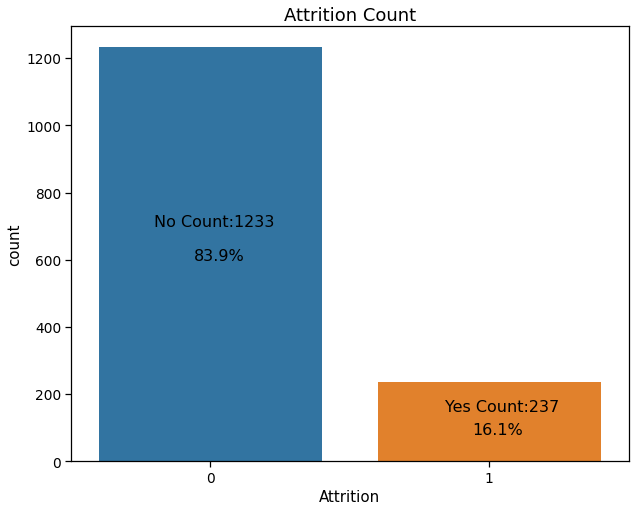

In [17]:
# Check the count for each entry in Attrition and show on a bar graph

y_count = HRData['Attrition'].value_counts()[1]
n_count = HRData['Attrition'].value_counts()[0]

plt.figure(figsize = (10,8))
sn.set_context('notebook',font_scale = 1.25)
sn.countplot(x = 'Attrition', data = HRData)
plt.annotate('No Count:'+str(n_count),xy=(-.2, 700),size = 16)
plt.annotate(str((round((n_count)/len(HRData)*100,1)))+"%",xy=(-.06, 600),size = 16)
plt.annotate('Yes Count:'+str(y_count),xy=(.84, 150),size = 16)
plt.annotate(str((round((y_count)/len(HRData)*100,1)))+"%",xy=(.94,80),size = 16)
plt.title('Attrition Count', size = 18)

In [6]:
# Check the statistic values for each numberic column
HRData.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.499320,7.008163,4.229252,2.187755,3.666667
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.899095,6.126525,3.623137,3.222430,3.659863
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,2.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,1.0,2068.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
# Check for null values
print('Null Value Exist: ', HRData.isnull().values.any(), '\n')

# Check for duplicates
print('Duplicates Exist: ', HRData.duplicated().any())

Null Value Exist:  False 

Duplicates Exist:  False


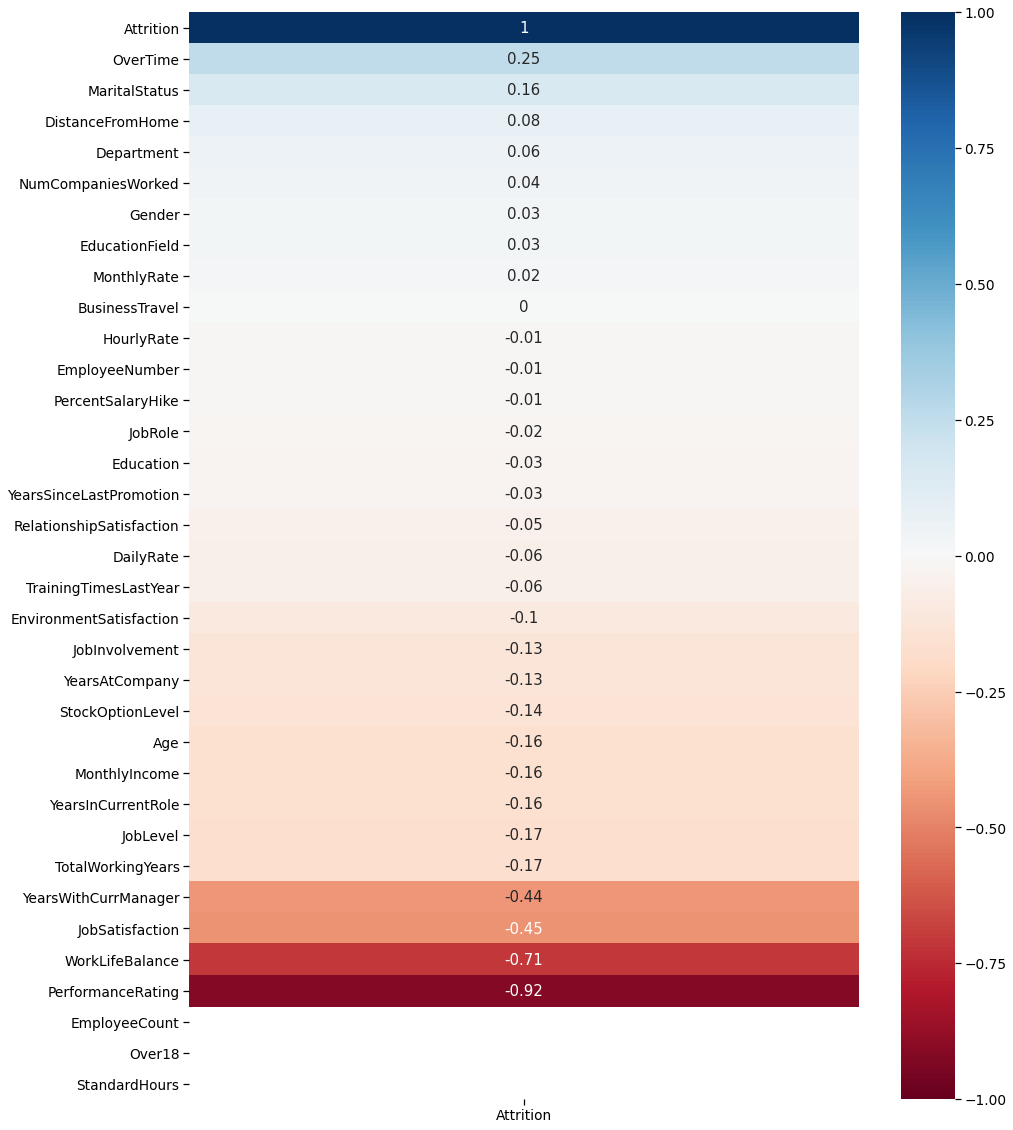

In [26]:
# Show a heatmap to check correlation with Attrition
plt.figure(figsize=(15,20))
sn.heatmap(round(HRData.corr()[['Attrition']].sort_values(by=['Attrition'], ascending = False),2),
           cmap="RdBu", vmin = -1, vmax = 1, annot = True)

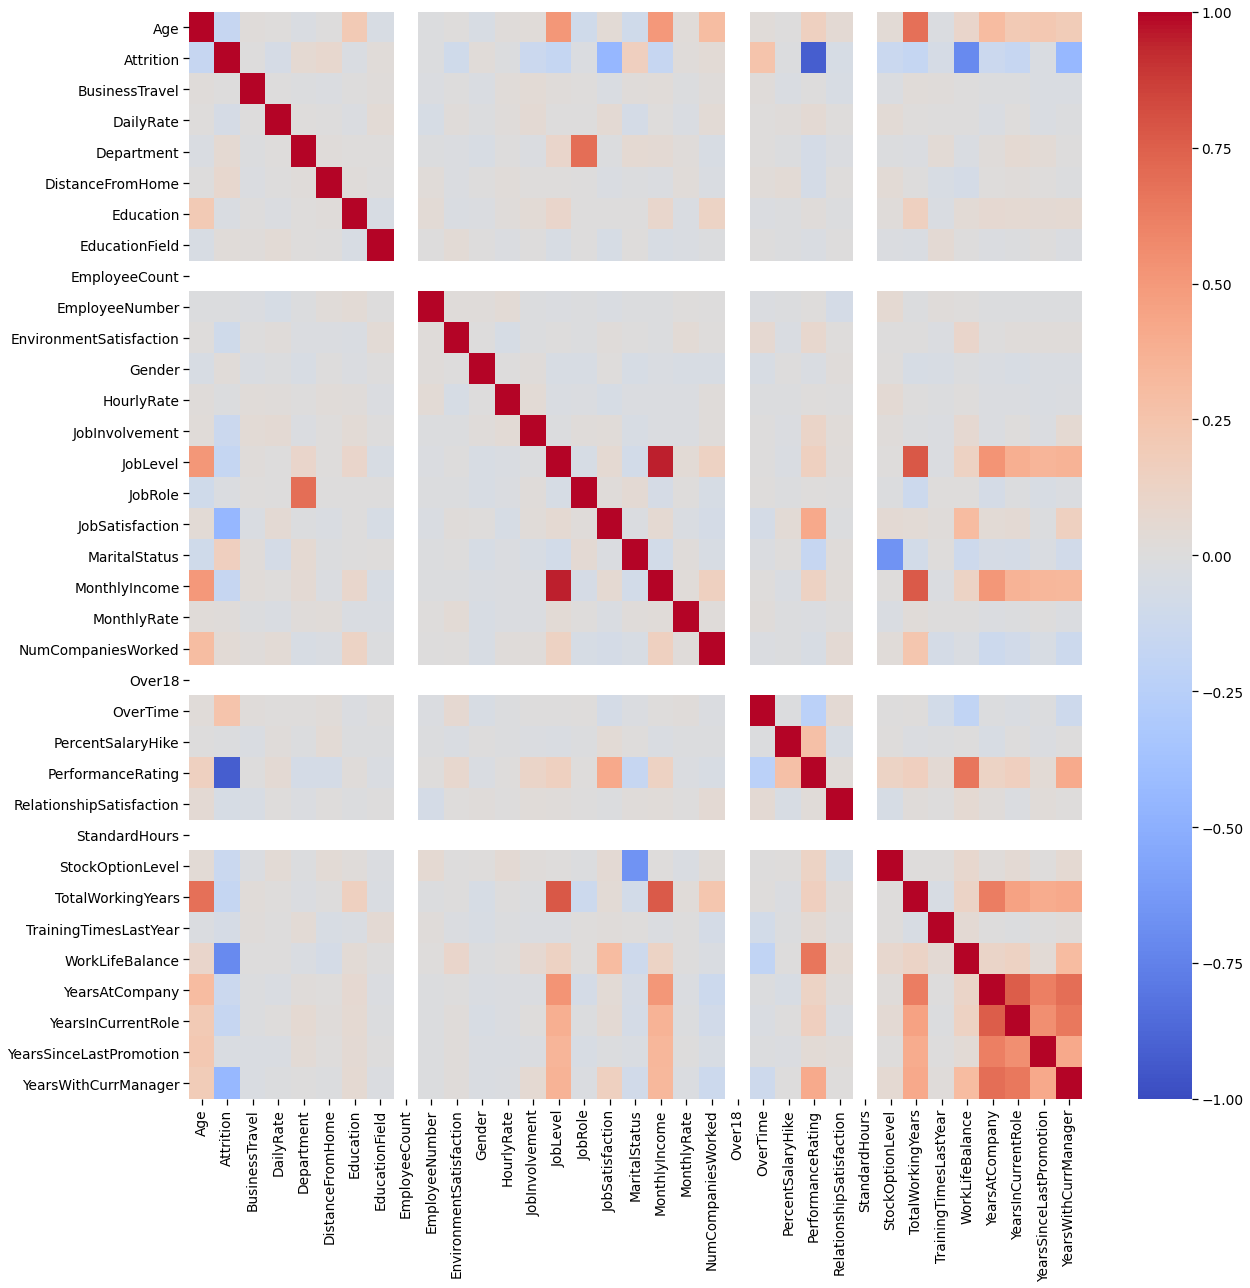

In [24]:
plt.figure(figsize=(20,20))
sn.heatmap(round(HRData.corr(),2),
           cmap="coolwarm", vmin = -1, vmax = 1)

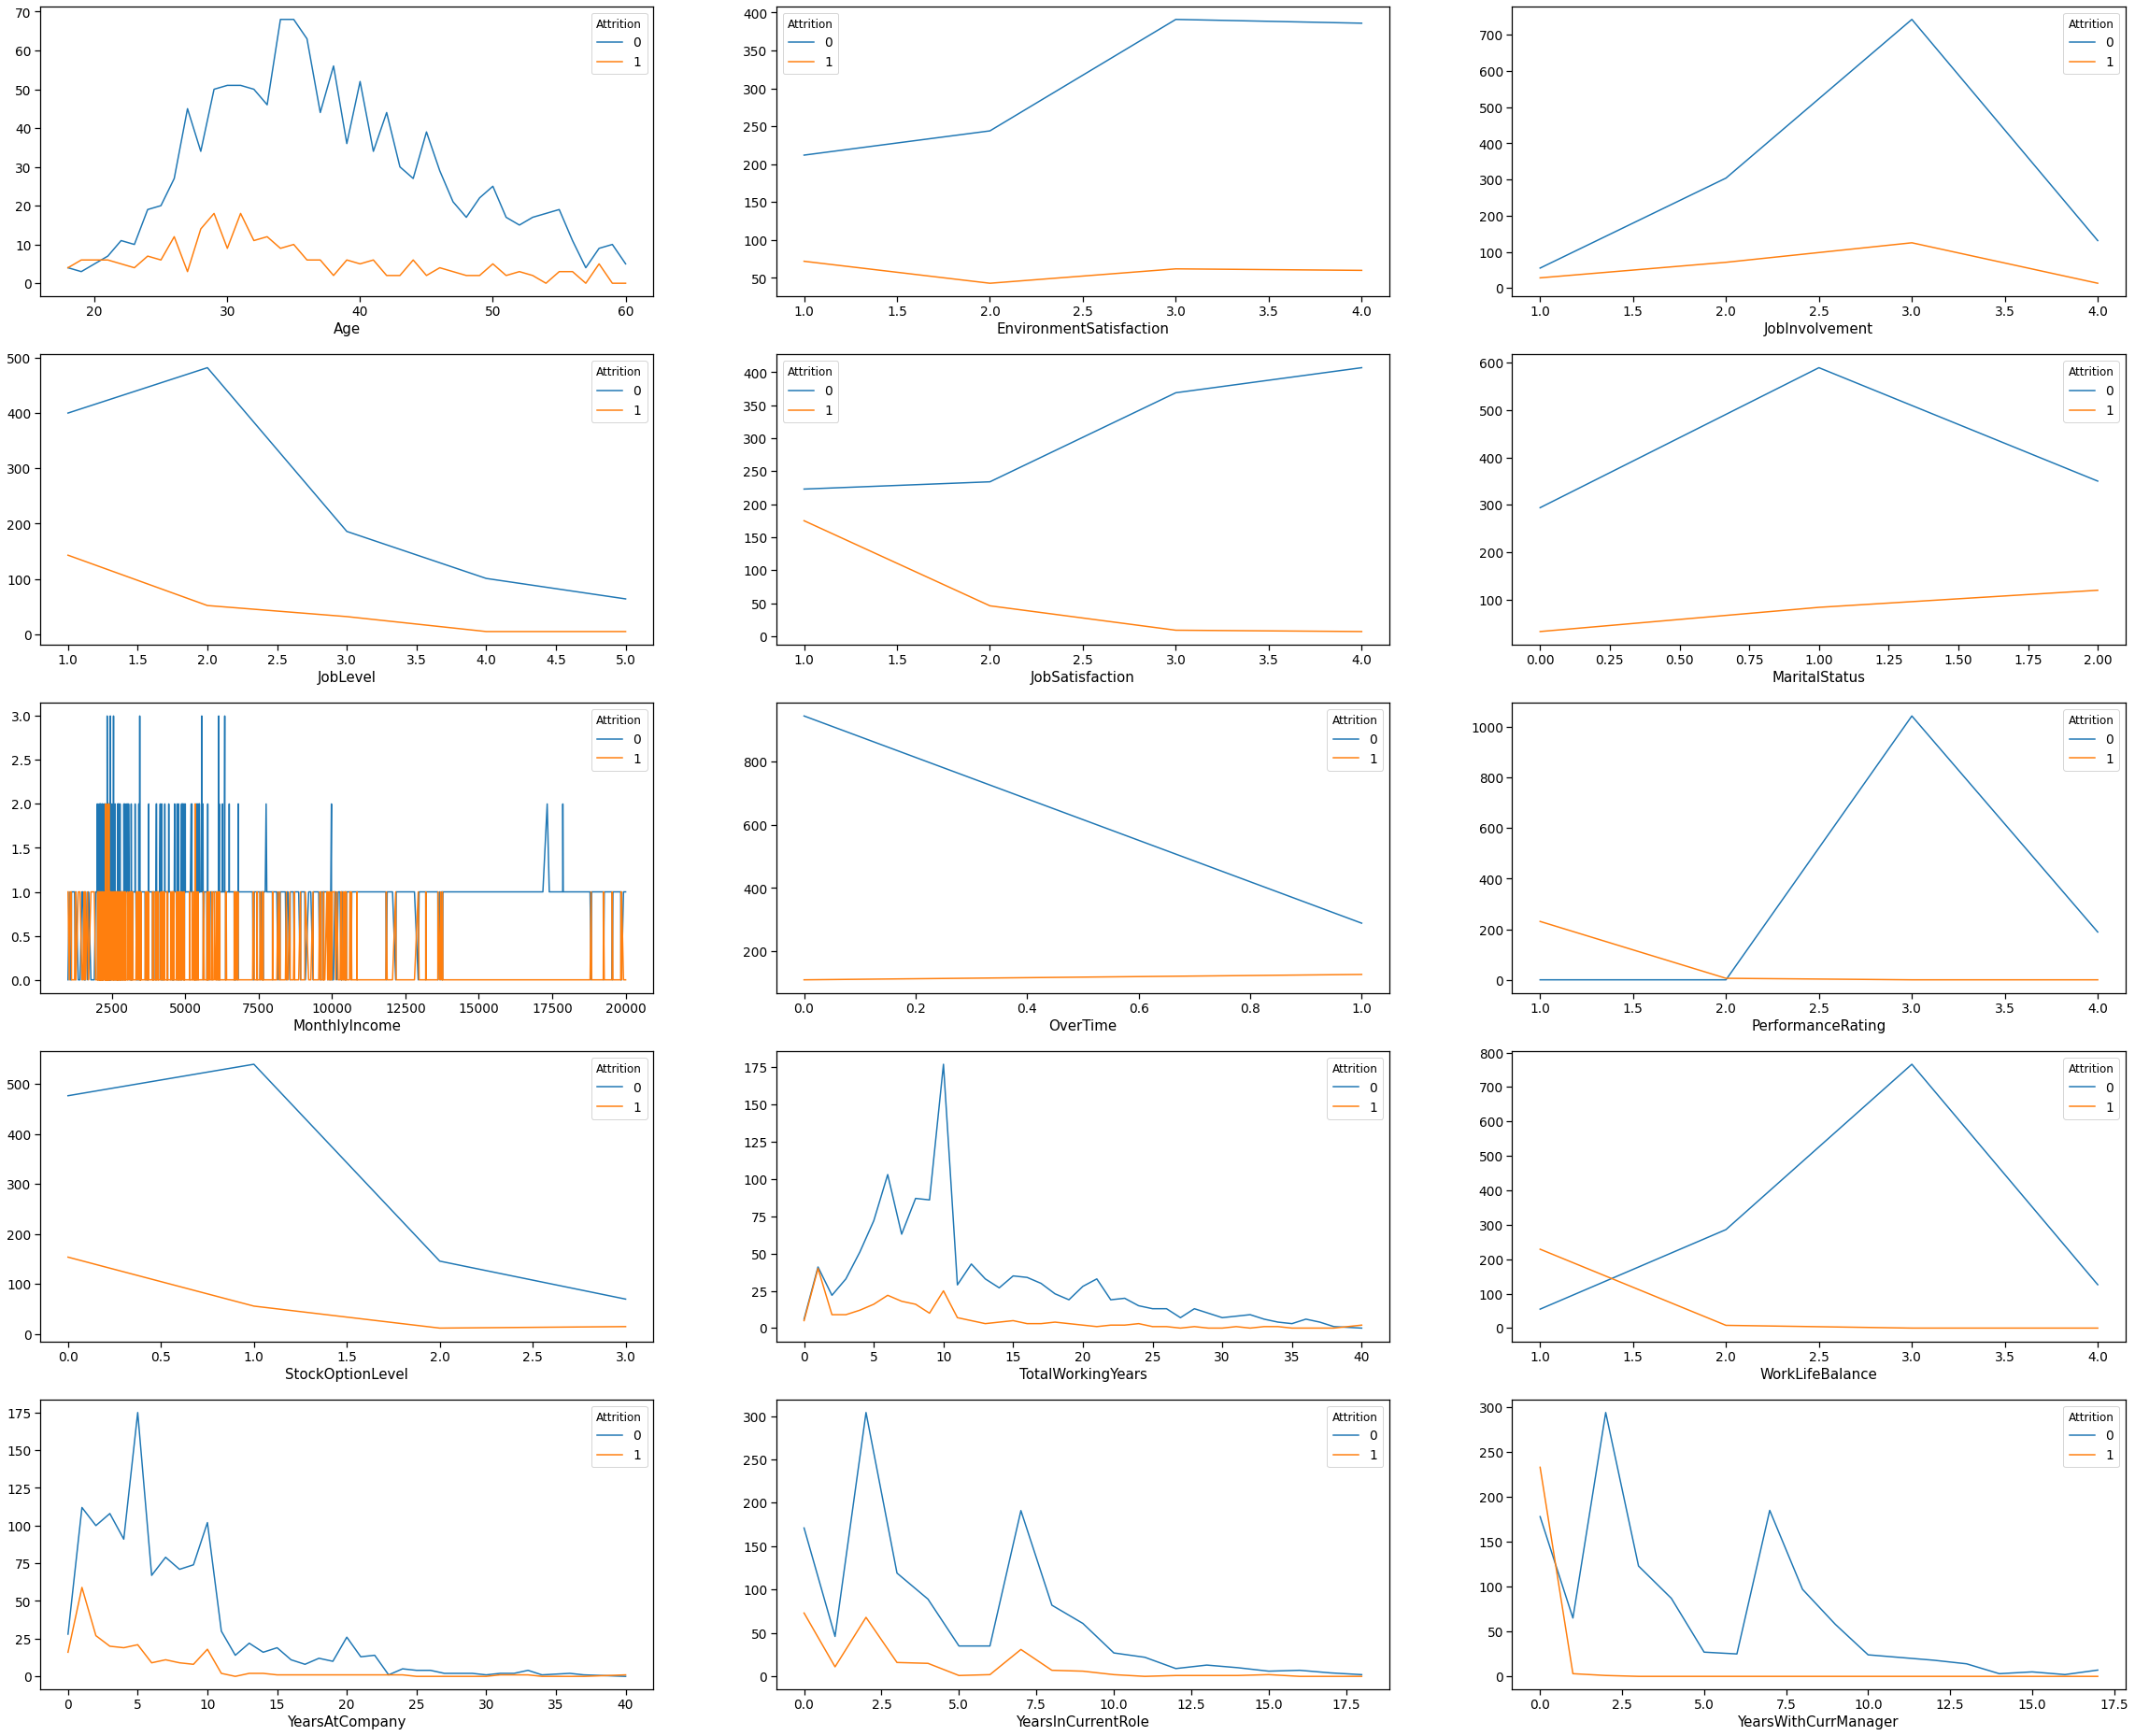

In [10]:
plt.figure(figsize=(40,40))
pnum = 1
for column in HRData:
    if column != 'Attrition' and (HRData.corr()[column]['Attrition'] <= -.1 or HRData.corr()[column]['Attrition'] >= .1):
        ax = plt.subplot(6,3,pnum)
        pd.crosstab(HRData[column], HRData['Attrition']).plot(kind = 'line',ax = ax)
        plt.xlabel(column)
        pnum += 1
plt.show()

In [11]:
# Check correlation to numeric variables 
keep_list=[]
drop_list=[]
for i in HRData:
    if HRData.corr()[i]['Attrition'] <= -.2 or HRData.corr()[i]['Attrition'] >= .2: 
        keep_list.append(i)
        
    else:
        drop_list.append(i)
        HRData.drop(i, axis = 1, inplace = True)
        
print("Possible Correlation:\n", keep_list)
print("\nDropped due to lack of correlation:\n", drop_list)

Possible Correlation:
 ['Attrition', 'JobSatisfaction', 'OverTime', 'PerformanceRating', 'WorkLifeBalance', 'YearsWithCurrManager']

Dropped due to lack of correlation:
 ['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion']


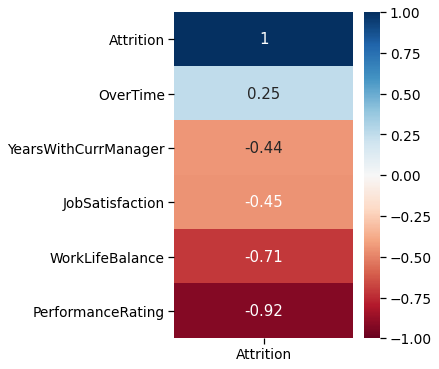

In [12]:
# Show a heatmap to check correlation
plt.figure(figsize=(4,6))
sn.heatmap(round(HRData.corr()[['Attrition']].sort_values(by=['Attrition'], ascending = False),2),
           cmap="RdBu", vmin = -1, vmax = 1, annot = True)

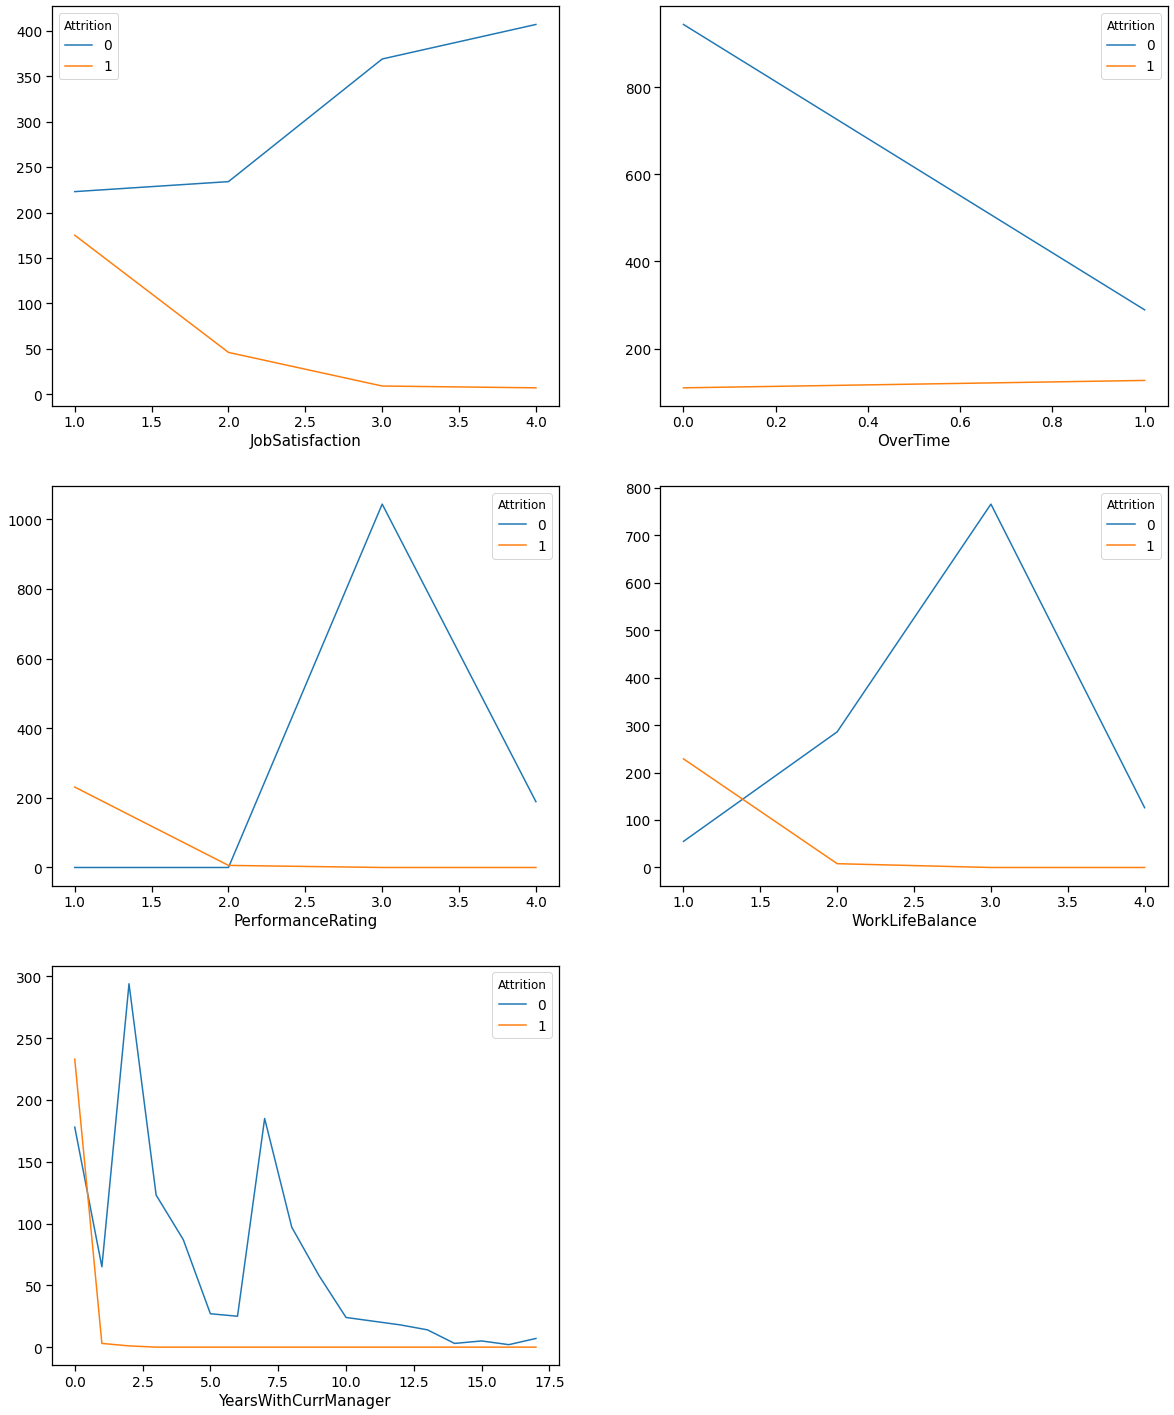

In [13]:
plt.figure(figsize=(20,25))
pnum = 1
for column in HRData:
    if column != 'Attrition' and (HRData.corr()[column]['Attrition'] <= -.1 or HRData.corr()[column]['Attrition'] >= .1):
        ax = plt.subplot(3,2,pnum)
        pd.crosstab(HRData[column], HRData['Attrition']).plot(kind = 'line',ax = ax)
        plt.xlabel(column)
        pnum += 1
plt.show()

In [221]:
HRData

,Attrition,JobSatisfaction,OverTime,PerformanceRating,WorkLifeBalance,YearsWithCurrManager
0,1,1,1,1,1,0
1,0,2,0,4,3,7
2,1,1,0,1,1,0
3,0,3,1,3,3,0
4,0,2,0,3,3,2
...,...,...,...,...,...,...
1465,0,4,0,3,3,3
1466,0,1,0,3,3,7
1467,0,2,1,4,3,3
1468,0,2,0,3,2,8


In [353]:
# Import necessary library
from sklearn.model_selection import train_test_split

# Assign columns to be used for model
feat_cols = ['JobSatisfaction','OverTime','PerformanceRating','WorkLifeBalance','YearsWithCurrManager']

x = HRData[feat_cols]
y = HRData['Attrition']

#Set training and testing values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=30)

In [354]:
# Import necessary library
from sklearn.linear_model import LogisticRegression

# Create logistic Regression model
logreg = LogisticRegression(random_state = 30)

logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)


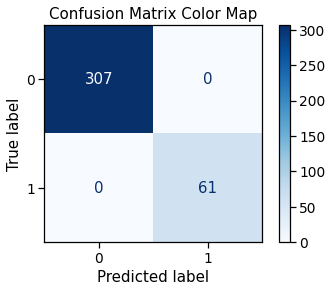

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       307
           1       1.00      1.00      1.00        61

    accuracy                           1.00       368
   macro avg       1.00      1.00      1.00       368
weighted avg       1.00      1.00      1.00       368



In [355]:
# Import necessary libraries
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Check model with confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot(cmap = plt.cm.Blues)
plt.title('Confusion Matrix Color Map')
plt.show()

#Show the classification report for the model
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.7418478260869565


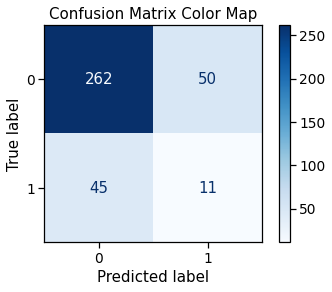

              precision    recall  f1-score   support

           0       0.85      0.84      0.85       312
           1       0.18      0.20      0.19        56

    accuracy                           0.74       368
   macro avg       0.52      0.52      0.52       368
weighted avg       0.75      0.74      0.75       368



In [356]:
from sklearn.ensemble import RandomForestClassifier

#Set training and testing values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state= 25)

rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(x_train,y_train)
rfc_pred = rfc.predict(x_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = metrics.confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot(cmap = plt.cm.Blues)
plt.title('Confusion Matrix Color Map')
plt.show()

#Show the classification report for the model
print(metrics.classification_report(y_test, y_pred))

Text(0.5, 1.0, 'Decision Tree from Random Forest')

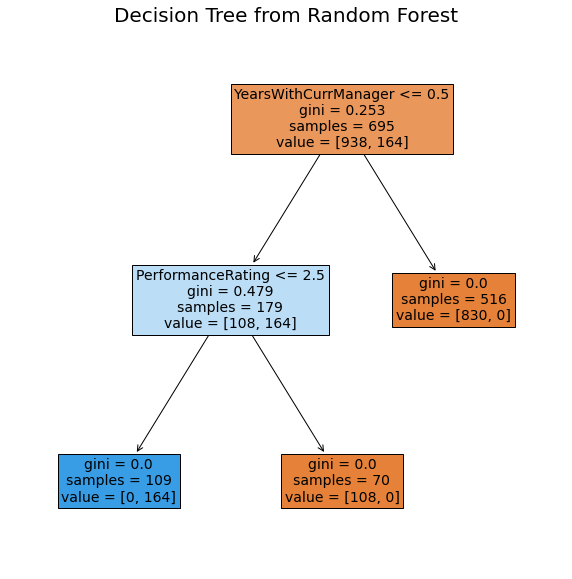

In [357]:
#Visualisation of 1st tree
from sklearn.tree import plot_tree

tree = rfc.estimators_[0]
plt.figure(figsize=(10,10))
plot_tree(tree,feature_names = feat_cols,filled = True )
plt.title("Decision Tree from Random Forest", size = 20)

Text(0.5, 1.0, 'Decision Tree from Random Forest')

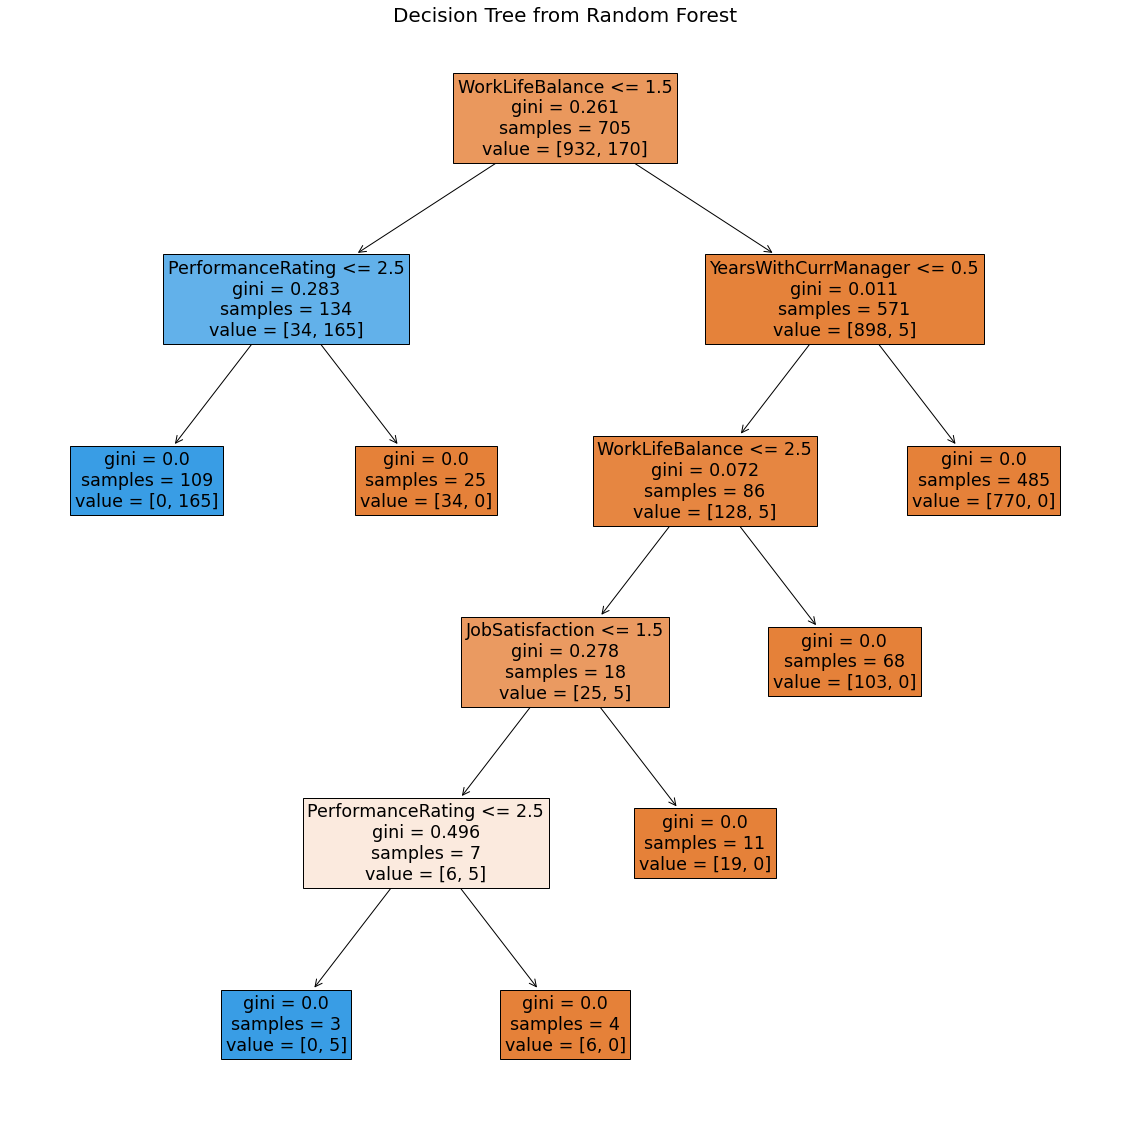

In [358]:
# Visualisation 15th tree
tree = rfc.estimators_[10]
plt.figure(figsize=(20,20))
plot_tree(tree,feature_names = feat_cols,filled = True )
plt.title("Decision Tree from Random Forest", size = 20)